In [ ]:
import numpy as np
from keras.utils.np_utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
X = np.load('/content/drive/My Drive/Colab Notebooks/ML/outputs/X_data_k_fold.npy')
np.random.shuffle(X)
y = X[:,-1]
X=X[:,:-1]

In [ ]:
kfold = KFold(5, True, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [ ]:
X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
i=0
result_list=[]
for train_index, test_index in kfold.split(X):
  #print('train: %s, test: %s' % (train_index, test_index))
  X_train= X[train_index]
  y_train=y[train_index]
  X_test=X[test_index]
  y_test=y[test_index]
  X_train=pd.DataFrame(data=X_train)
  y_train=pd.DataFrame(data=y_train)
  y_test=pd.DataFrame(data=y_test)
  X_test=pd.DataFrame(data=X_test)  
  one_hot_train_labels = to_categorical(y_train)
  one_hot_test_labels = to_categorical(y_test)
  X_test_list.append(X_test)
  y_test_list.append(one_hot_test_labels)


  logreg = svm.SVC()

  # fit the model with data
  logreg.fit(X_train,y_train)

  #
  y_pred=logreg.predict(X_test)
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  result_list.append(cnf_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
result_list[0]

array([[116,   0,   4,   1,   0],
       [  0, 110,  24,   0,   0],
       [  0,   0, 361,   0,   1],
       [  2,   1,   4, 199,   0],
       [  2,   0,   1,   2,  59]])

In [ ]:
a=[]
for m in range(0, 5):
  total=sum(map(sum,result_list[m]))
  curr=0
  for n in range(0,5):
    curr=curr+result_list[m][n][n]
  result=curr/total
  a.append(result)
a=np.array(a)
ma=np.mean(a)
va=np.var(a)
print(ma,va)

0.947427221898453 2.3789586436104056e-05


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=15)
    plt.clim(0, 460)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,fontsize=12)
    plt.yticks(tick_marks, classes,fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    plt.tight_layout()

Confusion matrix
[[115   0  10   0   0]
 [  3 102  26   3   0]
 [  0   0 365   0   1]
 [  0   0   4 180   0]
 [  2   0   2   1  72]]


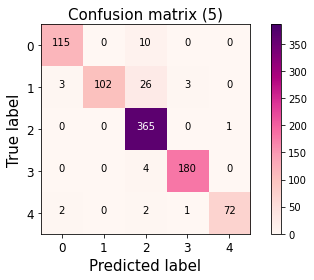

In [ ]:
plt.grid(False) 

#plot_confusion_matrix(cnf_matrix, classes=attack_types, normalize=False, title='Normalized confusion matrix')
plot_confusion_matrix(result_list[4], classes=['0','1','2','3','4'],
                      title='Confusion matrix (5)')